#### extrai atributos geometricos numa janela em tempo e em tracos
#### constroi imagens dos atributos individuais

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import segyio
from PIL import Image  

In [2]:
def normalize(v):
    norm=np.linalg.norm(v, ord=1)
    if norm==0:
        norm=np.finfo(v.dtype).eps
    return v/norm

In [3]:
path = input('path do arquivo: ')
if path == '':
    #path = '/home/claudio/dados/BR/correlacao/'
    path = '/home/claudio/dados/BR/sgy/envelop/'
    
exten = input('extensão: ')
if exten == '':
    exten = '.sgy'
name = input('Nome do arquivo: ')
if name  == '':
    #name = 'TUP188.08@R00172A' - nao envelopado
    #name = 'TUP188.08@R00145A'
    #name = 'TUP188.08@R00232A'
    #name = 'TUP188.08@R00317_2'
    #name = 'TUP188.08@R00402_2'
    #name = 'TUP188.08@R00372A'
    #name = 'TUP188.08@R00293A'  # o menor arquivo
    #name = '127a.1.a.0.et.subb'
    #name = '147.1.a.0.et.subb'
    #name = '147.1.a.0.et.subbimg2' - erro: trace lengths possibly of non-uniform
    #name = '147.1.a.0.et.subbdrv1' - erro - idem
    #name = '102 CATUA_2_part-02'
    name = '102 CATUA_1_part-03'
    #name = 'ARU231.10@R00071'
    #name = 'ARU231.10@R00187A'
    #name = 'IRC152.06@R00085A_1'
    #name = 'IRC152.06@R00115A'
    #name = 'IRC152.06@R00111A_2'
    #name = '301.1.b.0.et.subb'

filename = path + name + exten
print('Arquivo: ',filename)

path do arquivo: 
extensão: 
Nome do arquivo: 
Arquivo:  /home/claudio/dados/BR/sgy/envelop/102 CATUA_1_part-03.sgy


In [4]:
with segyio.open(filename, ignore_geometry=True) as f:
    # Get basic attributes
    n_traces = f.tracecount
    sample_rate = segyio.tools.dt(f) /1000000
    n_samples = f.samples.size
    twt = f.samples
    data = f.trace.raw[:]  # Get all data into memory (could cause on big files)
    sr = sample_rate
    fr = segyio.TraceField.FieldRecord
    rec_num = f.attributes(fr)[:]  # array of field record number

print(f'Num Traces: {n_traces}, Num Samples: {n_samples}, Sample rate: {sample_rate} s, Trace length: {max(twt)} ms')

Num Traces: 10704, Num Samples: 2604, Sample rate: 6.3e-05 s, Trace length: 163.989 ms


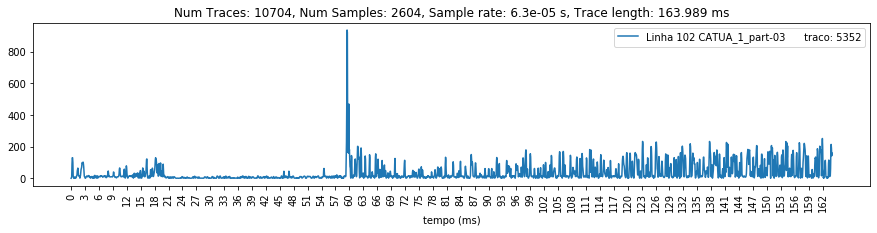

In [5]:
plt.figure(figsize=(15,3))

tr = int(n_traces/2)  # pega um traco do meio qq para definir janela (opcao: colocar toda a imagem sismica)
n = sample_rate * n_samples * 1000  # xmax em ms
x = np.linspace(0, n, n_samples)  # eixo x
y = data[tr]   # pega o array do traco

num = n//50
interv = np.arange(0, n, num)
plt.xticks(interv, rotation='vertical')
plt.plot(x, y, label=('Linha '+name+'      traco: '+ str(tr)))
plt.xlabel('tempo (ms)')
plt.title(f'Num Traces: {n_traces}, Num Samples: {n_samples}, Sample rate: {sample_rate} s, Trace length: {max(twt)} ms')
plt.legend()
plt.savefig(path+name+'_sample_trace.png')
plt.show()

In [6]:
print('******* Definir janela da imagem **********')
print('************ 1 ms = 0.75 m ****************')
tmi = int(input('tempo inicial (ms):'))
tmf = int(input('tempo final (ms):'))
tri = int(input('traco inicial:'))
trf = int(input('traco final:'))


******* Definir janela da imagem **********
************ 1 ms = 0.75 m ****************
tempo inicial (ms):58
tempo final (ms):158
traco inicial:5000
traco final:5200


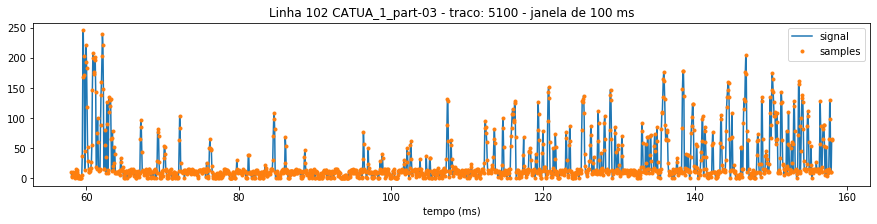

In [7]:
# convertendo ms to samples
spi = int(tmi/sr /1000 )  # amostra inicial
spf = int(tmf/sr /1000 )  # amostra final

sig = data[tri:trf, spi:spf]

tr = (trf - tri)//2 # pega o traco do meio

y = data[tr, spi:spf]   # y sao os dados da janela em samples no traco tr
x = np.linspace(tmi, tmf, len(y))  # eixo x em milisegundos

plt.figure(figsize=(15,3))
plt.xlabel('tempo (ms)')
plt.title('Linha '+name+' - traco: '+ str(tri + tr)+' - janela de '+ str(tmf - tmi)+' ms')
plt.plot(x, y, label=('signal'))
plt.plot(x, y, '.', label=('samples'))
plt.legend()
plt.savefig(path+name+'_window_trace.png')
plt.show()

In [8]:
time = []
n_spike = []
n_traco = []

larg_esq = []
larg_dir = []
alt_esq = []
alt_dir = []
area_esq = []
area_dir = []
ratio_esq = []
ratio_dir = []
grad_esq = []
grad_dir = []
ang_spike = []
ratio_areas = []

assim = []

img1 = []
img2 = []
img3 = []
img4 = []
img5 = []
img6 = []
img7 = []
img8 = []
img9 = []
img10 = []

In [9]:
trc = -1  


for tr in range(tri, trf):
    
    sig_1t = data[tr, spi:spf]   # dados da janela em samples em cada traco 
    x = np.arange(len(sig_1t))
    
    peaks, properties = find_peaks(sig_1t)  # encontra o x de todos os peaks    

    trc += 1   # contador de tracos
    incr = 0   # contador de spikes
    
    ymins = []
    xmins = []
    ymin = 1e6
    
    for ip in range(peaks.size-1):  # calcula os minimos entre peaks

        i1 = int(x[peaks[ip]])
        i2 = int(x[peaks[ip+1]])

        for im in range(i1, i2):

            if sig_1t[im] < ymin:
                ymin = sig_1t[im]
                xmin = x[im]                

        ymins.append(ymin)  # salva os minimos no intervalo entre 2 peaks
        xmins.append(xmin)
        
        ymin = 1e6

        

    for id in range(len(xmins)):    


        dx1 = xmins[id] - x[peaks[id]]
        larg_esq.append(dx1)

        dy1 = sig_1t[peaks[id]] - ymins[id]
        alt_esq.append(dy1)

        dx2 = x[peaks[id+1]] - xmins[id] 
        larg_dir.append(dx2)

        dy2 = sig_1t[peaks[id+1]] - ymins[id]
        alt_dir.append(dy2)

        #=====================================

        aesq = (dx1*dy1)/2  # area a esquerda
        area_esq.append(aesq)

        adir = (dx2*dy2)/2 # area a direita 
        area_dir.append(adir)

        # relacao base x altura (ratio)
        ratio_esq.append(dx1/dy1)
        ratio_dir.append(dx2/dy2)

        # gradientes
        grad_esq.append(np.arctan2(dy1, dx1) * 180 / np.pi)
        grad_dir.append(np.arctan2(dy2, dx2) * 180 / np.pi)
        
        # angulo to topo dos spikes
        ge = np.arctan2(dy1, dx1) * 180 / np.pi
        gd = np.arctan2(dy2, dx2) * 180 / np.pi
        ang = (90 - ge) + (90 - gd)
        ang_spike.append(ang)
        
        # razao entre areas esq e dir
        raz_areas = aesq / adir
        ratio_areas.append(raz_areas)

        # assimetria   # alterei pra usar o angulo do spike e nao as areas
        if gd > ge:
            assim.append(1)
        else:
            assim.append(0)

        n_spike.append(incr)
        incr += 1         # contador de spikes

        t = peaks[id]*sr*1000 + tmi  # samples to ms
        time.append(t)   

        n_traco.append(trc) #  numerador de tracos
        
    # ==================================  
    
    z1 = np.zeros(len(sig_1t))
    z2 = np.zeros(len(sig_1t))
    z3 = np.zeros(len(sig_1t))
    z4 = np.zeros(len(sig_1t))
    z5 = np.zeros(len(sig_1t))
    z6 = np.zeros(len(sig_1t))
    z7 = np.zeros(len(sig_1t))
    z8 = np.zeros(len(sig_1t))
    z9 = np.zeros(len(sig_1t))
    z10 = np.zeros(len(sig_1t))
    
    for i in range(len(xmins)):

        z1[xmins[i]] = larg_esq[i] # substitui o valor do atributo no array z na posicao do peak
        z2[xmins[i]] = larg_dir[i] 
        z3[xmins[i]] = area_esq[i] 
        z4[xmins[i]] = area_dir[i] 
        z5[xmins[i]] = ratio_esq[i] 
        z6[xmins[i]] = ratio_dir[i] 
        z7[xmins[i]] = grad_esq[i] 
        z8[xmins[i]] = grad_dir[i] 
        z9[xmins[i]] = ang_spike[i] 
        z10[xmins[i]] = ratio_areas[i]         
        
    img1= np.append(img1, z1)   # largura esq
    img2= np.append(img2, z2)   # larg dir
    img3= np.append(img3, z3)   # area esq
    img4= np.append(img4, z4)   # area dir
    img5= np.append(img5, z5)   # ratio esq
    img6= np.append(img6, z6)   # ratio dir
    img7= np.append(img7, z7)   # grad esq
    img8= np.append(img8, z8)   # grad dir
    img9= np.append(img9, z9)   # angulo spike
    img10= np.append(img10, z10)  # ratio areas


In [10]:
path = '/home/claudio/dados/BR/sgy/envelop/img/'

#### imagens dos tributos

In [26]:
# normalizando os atributos

img1 = normalize(img1)
img1 = img1/(img1.max()/255.0)
img1.max
img2 = normalize(img2)
img2 = img2/(img2.max()/255.0)
img3 = normalize(img3)
img3 = img3/(img3.max()/255.0)
img4 = normalize(img4)
img4 = img4/(img4.max()/255.0)
img5 = normalize(img5)
img5 = img5/(img5.max()/255.0)
img6 = normalize(img6)
img6 = img6/(img6.max()/255.0)
img7 = normalize(img7)
img7 = img7/(img7.max()/255.0)
img8 = normalize(img8)
img8 = img8/(img8.max()/255.0)
img9 = normalize(img9)
img9 = img9/(img9.max()/255.0)
img10 = normalize(img10)
img10 = img10/(img10.max()/255.0)


In [12]:
# somando atributos
# gradiente esq + gradiente dir

stack_grad = [img7[i] + img8[i] for i in range(len(img7))]

# angulo spike + os dois gradientes
stack = [img9[i] + stack_grad[i] for i in range(len(img9))]

#refazendo a matriz imagem
im = np.reshape(stack, (trf - tri, spf - spi)) 
img = im.T

# salvando a matriz stack das imagens
f = path+name+'_ang_spike+grad.txt'
np.savetxt(f, img, fmt='%.2f')

FileNotFoundError: [Errno 2] No such file or directory: '/home/claudio/dados/BR/sgy/envelop/img/102 CATUA_1_part-03_ang_spike+grad.txt'

In [ ]:
# somando atributos
# ratios esq + dir + ratio_areas

stack_ratio = [img5[i] + img6[i] for i in range(len(img1))]

stack1 = [img10[i] + stack_ratio[i] for i in range(len(img1))]

#refazendo a matriz imagem
im = np.reshape(stack1, (trf - tri, spf - spi)) 
img = im.T

# salvando a matriz stack das imagens
f = path+name+'_todos_ratio.txt'
np.savetxt(f, img, fmt='%.2f')



In [ ]:
# refazendo a matriz da imagem
img1 = np.reshape(img1, (trf - tri, spf - spi)) 
im1 = img1.T
img2 = np.reshape(img2, (trf - tri, spf - spi)) 
im2 = img2.T
img3 = np.reshape(img3, (trf - tri, spf - spi))
im3 = img3.T
img4 = np.reshape(img4, (trf - tri, spf - spi))
im4 = img4.T
img5 = np.reshape(img5, (trf - tri, spf - spi)) 
im5 = img5.T
img6 = np.reshape(img6, (trf - tri, spf - spi)) 
im6 = img6.T
img7 = np.reshape(img7, (trf - tri, spf - spi)) 
im7 = img7.T
img8 = np.reshape(img8, (trf - tri, spf - spi)) 
im8 = img8.T
img9 = np.reshape(img9, (trf - tri, spf - spi)) 
im9 = img9.T
img10 = np.reshape(img10, (trf - tri, spf - spi)) 
im10 = img10.T

In [ ]:
# salvando a matriz-imagem dos atributos separados

f = path+name+'_larg_esq.txt'
np.savetxt(f, im1, fmt='%.2f')
f = path+name+'_larg_dir.txt'
np.savetxt(f, im2, fmt='%.2f')
f = path+name+'_area_esq.txt'
np.savetxt(f, im3, fmt='%.2f')
f = path+name+'_area_dir.txt'
np.savetxt(f, im4, fmt='%.2f')
f = path+name+'_ratio_esq.txt'
np.savetxt(f, im5, fmt='%.2f')
f = path+name+'_ratio_dir.txt'
np.savetxt(f, im6, fmt='%.2f')
f = path+name+'_grad_esq.txt'
np.savetxt(f, im7, fmt='%.2f')
f = path+name+'_grad_dir.txt'
np.savetxt(f, im8, fmt='%.2f')
f = path+name+'_ang_spike.txt'
np.savetxt(f, im9, fmt='%.2f')
f = path+name+'_ratios_areas.txt'
np.savetxt(f, im10, fmt='%.2f')

print('finish')

In [ ]:
print('Height= '+str(trf-tri)+' Width= '+str(spf-spi))

In [ ]:
f = path+name+'_raw_signal.txt'
sig = sig.T
np.savetxt(f, sig, fmt='%.2f')

In [ ]:
Image.fromarray(img.astype('uint8')).save(path+name+'_ang_spike+grad.png') # don't need to convert

